In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from READ_ART_bigendian import read_ART


In [2]:
! ls /home/hpc/klumpke/ojimenez/Escritorio/phD/2021/OCRE_simulations/ART_pure_Nbody-master/RUN/snapshots/

plots		  PMcrda0.6950.DAT   PMcrs0a0.6900.DAT	pta0.6850.dat
PMcrda0.6800.DAT  PMcrda0.7000.DAT   PMcrs0a0.6950.DAT	pta0.6900.dat
PMcrda0.6850.DAT  PMcrs0a0.6800.DAT  PMcrs0a0.7000.DAT	pta0.6950.dat
PMcrda0.6900.DAT  PMcrs0a0.6850.DAT  pta0.6800.dat	pta0.7000.dat


In [4]:
galaxy = 'snapshots'
a = '0.6850'

MW = 'yes'
MW = 'no'

if galaxy == 'snapshots':
    path = '/home/hpc/klumpke/ojimenez/Escritorio/phD/2021/OCRE_simulations/ART_pure_Nbody-master/RODIN/LMC_relaxed+SMC+MW/'
    path2 = '/home/hpc/klumpke/ojimenez/Escritorio/phD/2021/OCRE_simulations/ART_pure_Nbody-master/RUN/snapshots/'
    filename = 'PMcrs0a'+a+'.DAT'
    f_LMC = open(path+"Rodin2.out_LMC", "r")
    f_SMC = open(path+"Rodin2.out_SMC", "r")
#     f_MW = open(path+"Rodin2.out_MW", "r")
    nstars_LMC = int(f_LMC.read().splitlines()[16][-9:])
    nstars_SMC = int(f_SMC.read().splitlines()[-1][-9:])
#     nstars_MW = int(f_MW.read().splitlines()[-1][-9:])
#     nstars_MW = 1
    nstars = nstars_LMC + nstars_SMC #+ nstars_MW
    print ('filename: '+str(filename))
    print ('Galaxy: LMC relaxed + SMC + MW (snapshot)')
    print ('')
    print ('Nstars (LMC) =    '+str(nstars_LMC))
    print ('Nstars (SMC) =     '+str(nstars_SMC))
#     print ('Nstars (MW) =           '+str(nstars_MW))
    print ('Nstars (total) =  '+str(nstars))
    print ('-----------------------------------------------------------------------------------------')
    mass,x,y,z,vx,vy,vz,Id=read_ART(path2,filename,nstars)


filename: PMcrs0a0.6850.DAT
Galaxy: LMC relaxed + SMC + MW (snapshot)

Nstars (LMC) =    1000015
Nstars (SMC) =     114373
Nstars (total) =  1114388
-----------------------------------------------------------------------------------------
discovered %s:%s particle_header /home/hpc/klumpke/ojimenez/Escritorio/phD/2021/OCRE_simulations/ART_pure_Nbody-master/RUN/snapshots/PMcrda0.6850.DAT
discovered %s:%s particle_data /home/hpc/klumpke/ojimenez/Escritorio/phD/2021/OCRE_simulations/ART_pure_Nbody-master/RUN/snapshots/PMcrs0a0.6850.DAT
[array([b': Npd=5e6 L=1/hMpc C=18.  Mh=1.05e11 Mo/     '], dtype='|S45')
 array([0.68506414], dtype=float32) array([0.], dtype=float32)
 array([0.], dtype=float32) array([0.00015], dtype=float32)
 array([567], dtype=int32) array([8.], dtype=float32)
 array([1.063745e+11], dtype=float32)
 array([1.2819578e+12], dtype=float32)
 array([1.2818713e+12], dtype=float32)
 array([1.2817878e+12], dtype=float32) array([-0.], dtype=float32)
 array([0.], dtype=float32) a

In [5]:
df = pd.DataFrame()
df['Id'] = Id[0]
df['x'], df['y'], df['z'] = x[0], y[0], z[0]
df['vx'], df['vy'], df['vz'] = vx[0], vy[0], vz[0]
df['mass'] = mass[0]
df['galaxy'] = 'LMC'
df.loc[0:nstars_SMC, 'galaxy'] = 'SMC'
df['specie'] = 'Star'

for i in range(1,len(x)):
    
    df_aux = pd.DataFrame()
    df_aux['Id'] = Id[i]
    df_aux['x'], df_aux['y'], df_aux['z'] = x[i], y[i], z[i]
    df_aux['vx'], df_aux['vy'], df_aux['vz'] = vx[i], vy[i], vz[i]
    df_aux['mass'] = mass[i]
    df_aux['galaxy'] = 'LMC'
    df_aux['specie'] = 'DM'+str(i)
    df = pd.concat([df,df_aux], ignore_index=True)
    
if MW == 'yes':
    df.loc[(df['galaxy']=='LMC') & (df['specie']=='DM'+str(len(x)-1)), ['galaxy','specie']] = ['MW', 'point-like']
     
df

,Id,x,y,z,vx,vy,vz,mass,galaxy,specie
0,0,-63.107559,-125.628639,31.303322,2898.099438,6920.240947,-931.788563,4571.674805,SMC,Star
1,1,-63.601930,-126.123448,31.354655,1098.131710,5244.129267,-913.585641,4571.674805,SMC,Star
2,2,-62.515042,-126.326067,31.449970,4620.250479,4118.022632,-427.994176,4571.674805,SMC,Star
3,3,-63.165279,-126.769076,31.193072,2346.604147,2798.304068,-1577.625173,4571.674805,SMC,Star
4,4,-63.307174,-126.345521,31.540328,1965.627649,4519.875112,-558.511965,4571.674805,SMC,Star
...,...,...,...,...,...,...,...,...,...,...
43157662,43157663,-83.457008,-78.626349,-80.915170,22412.879324,23014.810281,19149.431386,18286.699219,LMC,DM3
43157663,43157664,-71.503379,143.563827,0.391278,19457.644381,-31862.205924,-943.590753,18286.699219,LMC,DM3
43157664,43157665,-14.323666,-135.105047,8.408430,5259.345135,36632.103131,-2913.472400,18286.699219,LMC,DM3
43157665,43157666,-124.566045,48.432548,63.154700,32261.613836,-8400.659486,-16366.491466,18286.699219,LMC,DM3


In [6]:
print ('Unique values from Specie and Mass Columns:')
print ((df['specie']+' '+df['mass'].astype(str)).unique())

Unique values from Specie and Mass Columns:
['Star 4571.6748046875' 'DM1 4571.6748046875' 'DM2 9143.349609375'
 'DM3 18286.69921875']


In [7]:
# df[df['specie']=='Star'].iloc[0]

In [8]:
mask_LMC_star = (df['galaxy'] == 'LMC') & (df['specie'] == 'Star')
mask_LMC_DM1 = (df['galaxy'] == 'LMC') & (df['specie'] == 'DM1')
mask_LMC_DM2 = (df['galaxy'] == 'LMC') & (df['specie'] == 'DM2')
mask_LMC_DM3 = (df['galaxy'] == 'LMC') & (df['specie'] == 'DM3')
mask_SMC_DM = (df['galaxy'] == 'SMC') & (df['specie'] == 'DM')
mask_MW = (df['galaxy'] == 'MW') & (df['specie'] == 'point-like')

mask_LMC_star_SMC_DM = mask_LMC_star | mask_SMC_DM
mask_LMC_DM = mask_LMC_DM1 | mask_LMC_DM2 | mask_LMC_DM3

masks = [mask_LMC_star_SMC_DM, mask_LMC_DM, mask_LMC_DM1, mask_LMC_DM2, mask_LMC_DM3]
title = ['LMC Stars + SMC DM', 'LMC DM', 'LMC DM1', 'LMC DM2', 'LMC DM3']

In [9]:
# nbins = 500

# xmin, xmax = -150, 150
# ymin, ymax = -150, 150
# zmin, zmax = -150, 150

# H_LMC, edges = np.histogramdd((df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['x'],
#                                df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['y'],
#                                df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['z']),
#                               bins = (nbins, nbins, nbins),
#                               range = ((xmin,xmax),(ymin,ymax),(zmin,zmax)))

# H_SMC, edges = np.histogramdd((df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['x'],
#                                df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['y'],
#                                df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['z']),
#                               bins = (nbins, nbins, nbins),
#                               range = ((xmin,xmax),(ymin,ymax),(zmin,zmax)))

# H_LMC = np.where(H_LMC == 0, np.nan, H_LMC)
# H_SMC = np.where(H_SMC == 0, np.nan, H_SMC)
# # pos_LMC_nan = np.where(H_LMC == 0)
# # H_LMC = np.delete(H_LMC, pos_LMC_nan)

# xedge = edges[0]
# yedge = edges[1]
# zedge = edges[2]

# Xcentre=0.5*(xedge[1:]+xedge[:-1])
# Ycentre=0.5*(yedge[1:]+yedge[:-1])
# Zcentre=0.5*(zedge[1:]+zedge[:-1])

# X, Y, Z = np.meshgrid(Xcentre,Ycentre,Zcentre)

In [10]:
nbins = 100

xmin, xmax = -150, 150
ymin, ymax = -150, 150
zmin, zmax = -150, 150

In [11]:
H_LMC, edges_LMC = np.histogramdd((df[mask_LMC_star]['x'],
                                   df[mask_LMC_star]['y'],
                                   df[mask_LMC_star]['z']),
                                  bins = (nbins, nbins, nbins),
                                  range = ((xmin,xmax),(ymin,ymax),(zmin,zmax)))

# pos_LMC_nan = np.where(H_LMC == 0)
# H_LMC = np.delete(H_LMC, pos_LMC_nan)
H_LMC = np.where(H_LMC == 0, np.nan, H_LMC)

Xcentre_LMC=0.5*(edges_LMC[0][1:]+edges_LMC[0][:-1])
Ycentre_LMC=0.5*(edges_LMC[1][1:]+edges_LMC[1][:-1])
Zcentre_LMC=0.5*(edges_LMC[2][1:]+edges_LMC[2][:-1])

del edges_LMC

X_LMC, Y_LMC, Z_LMC = np.meshgrid(Xcentre_LMC,Ycentre_LMC,Zcentre_LMC)

del Xcentre_LMC, Ycentre_LMC, Zcentre_LMC

# X_LMC = np.delete(X_LMC, pos_LMC_nan)
# Y_LMC = np.delete(Y_LMC, pos_LMC_nan)
# Z_LMC = np.delete(Z_LMC, pos_LMC_nan)


In [12]:
H_SMC, edges_SMC = np.histogramdd((df[mask_SMC_DM]['x'],
                                   df[mask_SMC_DM]['y'],
                                   df[mask_SMC_DM]['z']),
                                  bins = (nbins, nbins, nbins),
                                  range = ((xmin,xmax),(ymin,ymax),(zmin,zmax)))

# pos_SMC_nan = np.where(H_SMC == 0)
# H_SMC = np.delete(H_SMC, pos_SMC_nan)
H_SMC = np.where(H_SMC == 0, np.nan, H_SMC)

Xcentre_SMC=0.5*(edges_SMC[0][1:]+edges_SMC[0][:-1])
Ycentre_SMC=0.5*(edges_SMC[1][1:]+edges_SMC[1][:-1])
Zcentre_SMC=0.5*(edges_SMC[2][1:]+edges_SMC[2][:-1])

del edges_SMC

X_SMC, Y_SMC, Z_SMC = np.meshgrid(Xcentre_SMC,Ycentre_SMC,Zcentre_SMC)

del Xcentre_SMC, Ycentre_SMC, Zcentre_SMC

# X_SMC = np.delete(X_SMC, pos_SMC_nan)
# Y_SMC = np.delete(Y_SMC, pos_SMC_nan)
# Z_SMC = np.delete(Z_SMC, pos_SMC_nan)


In [13]:
np.shape(X_SMC)

(100, 100, 100)

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/hpc/klumpke/ojimenez/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1019: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


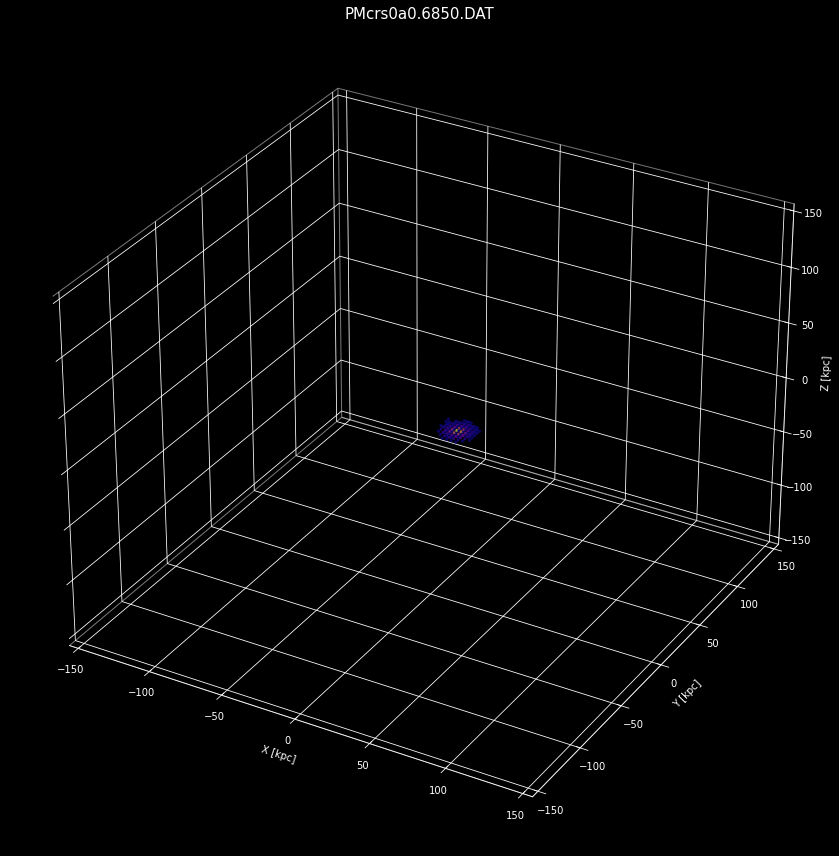

In [14]:
# %matplotlib notebook
%matplotlib inline

# xmin, xmax = -150, 150
# ymin, ymax = -150, 150
# zmin, zmax = -150, 150

plt.style.use('dark_background')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
# fig.set_facecolor('black')
# ax.set_facecolor('black')
# cmhot = plt.get_cmap("hot")
ax.scatter(X_LMC,Y_LMC,Z_LMC, c=H_LMC, cmap=plt.get_cmap("plasma"), s=5)
ax.scatter(X_SMC,Y_SMC,Z_SMC, c=H_SMC, cmap=plt.get_cmap("plasma"), s=5)
# ax.scatter(df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['x'],
#            df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['y'],
#            df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['z'],
#            c='yellow', s=0.1)
# ax.scatter(df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['x'],
#            df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['y'],
#            df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['z'],
#            c='purple', s=0.1)
# ax.scatter(rrlyrae_noparallaxcut['X'], rrlyrae_noparallaxcut['Y'], rrlyrae_noparallaxcut['Z'], c='purple', s=2)
# ax.scatter(rrlyrae_bridge['X'], rrlyrae_bridge['Y'], rrlyrae_bridge['Z'], c='r')
# ax.scatter(-R_sun,0,0,marker=(5, 1),c='k',s=105)
# ax.text(30,-40,-65,'SMC', fontsize = 15)
# ax.text(-20,-44,-35,'LMC', fontsize = 15)
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
# ax.set_title(filename, fontsize= 15, color='white')
ax.set_title(filename, fontsize= 15)
ax.invert_zaxis()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)
ax.view_init(30, -60)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

fig.tight_layout()
fig.savefig(path2+'plots/PMcrs0a'+a+'_hist3d.png', bbox_inches='tight', facecolor='w')
plt.show()

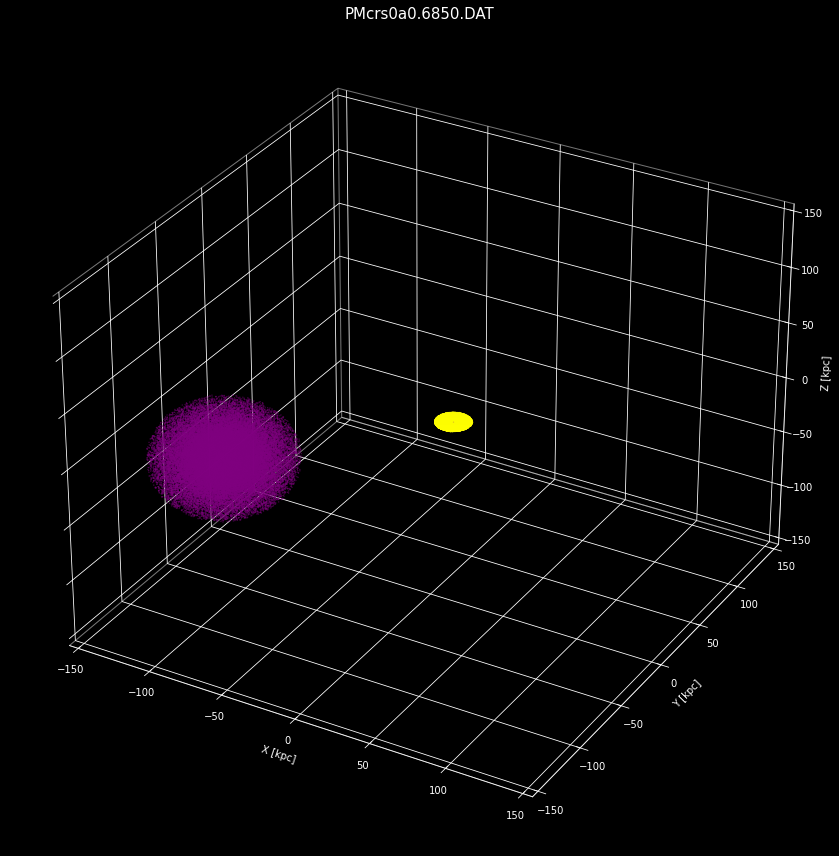

In [15]:
# %matplotlib notebook
%matplotlib inline

xmin, xmax = -150, 150
ymin, ymax = -150, 150
zmin, zmax = -150, 150

plt.style.use('dark_background')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
# fig.set_facecolor('black')
# ax.set_facecolor('black') 
ax.scatter(df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['x'],
           df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['y'],
           df[(df['galaxy']=='LMC') & (df['specie']=='Star')]['z'],
           c='yellow', s=0.1)
ax.scatter(df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['x'],
           df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['y'],
           df[(df['galaxy']=='SMC') & (df['specie']=='Star')]['z'],
           c='purple', s=0.1)
# ax.scatter(rrlyrae_noparallaxcut['X'], rrlyrae_noparallaxcut['Y'], rrlyrae_noparallaxcut['Z'], c='purple', s=2)
# ax.scatter(rrlyrae_bridge['X'], rrlyrae_bridge['Y'], rrlyrae_bridge['Z'], c='r')
# ax.scatter(-R_sun,0,0,marker=(5, 1),c='k',s=105)
# ax.text(30,-40,-65,'SMC', fontsize = 15)
# ax.text(-20,-44,-35,'LMC', fontsize = 15)
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
# ax.set_title(filename, fontsize= 15, color='white')
ax.set_title(filename, fontsize= 15)
ax.invert_zaxis()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)
ax.view_init(30, -60)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

fig.tight_layout()
fig.savefig(path2+'plots/PMcrs0a'+a+'_scatterplot.png', bbox_inches='tight', facecolor='w')
plt.show()